Epoch 1/15
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 146s 102ms/step - accuracy: 0.5862 - loss: 1.4382 - val_accuracy: 0.8595 - val_loss: 0.4064
Epoch 2/15
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 200s 101ms/step - accuracy: 0.8397 - loss: 0.4703 - val_accuracy: 0.8710 - val_loss: 0.3571
Epoch 3/15
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 142s 101ms/step - accuracy: 0.8594 - loss: 0.3946 - val_accuracy: 0.8730 - val_loss: 0.3484
Epoch 4/15
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 202s 101ms/step - accuracy: 0.8714 - loss: 0.3583 - val_accuracy: 0.8775 - val_loss: 0.3315
Epoch 5/15
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 202s 101ms/step - accuracy: 0.8778 - loss: 0.3273 - val_accuracy: 0.8848 - val_loss: 0.3155
Epoch 6/15
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 200s 100ms/step - accuracy: 0.8871 - loss: 0.3043 - val_accuracy: 0.8861 - val_loss: 0.3117
Epoch 7/15
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 141s 99ms/step - accuracy: 0.8900 - loss: 0.2913 - val_accuracy: 0.8832 - val_loss: 0.3193
Epoch 8/15
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 142s 99ms/step - accu

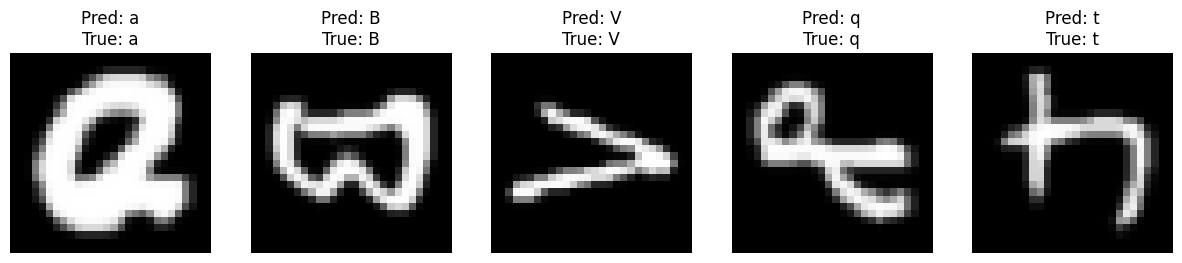

Character Sample 1: Predicted = a, Actual = a
Character Sample 2: Predicted = B, Actual = B
Character Sample 3: Predicted = V, Actual = V
Character Sample 4: Predicted = q, Actual = q
Character Sample 5: Predicted = t, Actual = t
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


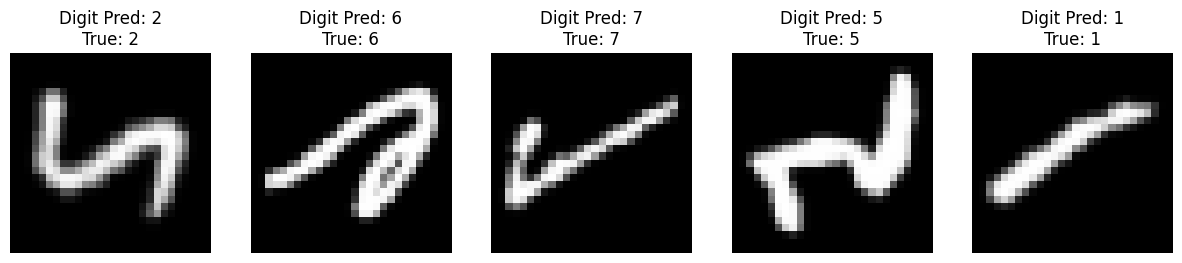

Digit Sample 1: Predicted = 2, Actual = 2
Digit Sample 2: Predicted = 6, Actual = 6
Digit Sample 3: Predicted = 7, Actual = 7
Digit Sample 4: Predicted = 5, Actual = 5
Digit Sample 5: Predicted = 1, Actual = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step

Basic Word Demo:
Predicted Word: hKf
Actual Word: hKF


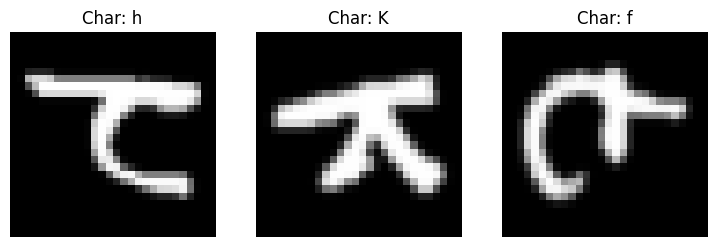

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# Import libraries
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
from google.colab import files

# Load EMNIST balanced dataset using as_data_source
builder = tfds.builder('emnist/balanced')
builder.download_and_prepare()  # Downloads ~536 MB if not cached

# Get train and test data as data sources
ds_train = builder.as_data_source(split='train')
ds_test = builder.as_data_source(split='test')

# Convert data source to numpy arrays for preprocessing
def preprocess(data_source):
    images = []
    labels = []
    for example in data_source:
        image = example['image']  # Already a NumPy array
        label = example['label']  # Already a NumPy array
        images.append(image)
        labels.append(label)
    images = np.array(images, dtype='float32') / 255.0  # Normalize
    images = images.reshape(-1, 28, 28, 1)             # Add channel dimension
    labels = tf.keras.utils.to_categorical(labels, 47)  # 47 classes
    return images, labels

# Process train and test data
X_train, y_train = preprocess(ds_train)
X_test, y_test = preprocess(ds_test)

# Build a revised CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(47, activation='softmax')  # 47 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy (Characters): {test_acc * 100:.2f}%")

# Predict on multiple character samples
num_samples = 5
samples = X_test[:num_samples]
predictions = model.predict(samples)

# EMNIST balanced mapping
emnist_labels = list('0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt')

# Show character predictions and images
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    predicted_class = np.argmax(predictions[i])
    actual_class = np.argmax(y_test[i])
    predicted_char = emnist_labels[predicted_class]
    actual_char = emnist_labels[actual_class]
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(samples[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_char}\nTrue: {actual_char}")
    plt.axis('off')
plt.show()

# Print character predictions
for i in range(num_samples):
    predicted_class = np.argmax(predictions[i])
    actual_class = np.argmax(y_test[i])
    print(f"Character Sample {i + 1}: Predicted = {emnist_labels[predicted_class]}, Actual = {emnist_labels[actual_class]}")

# Test digits specifically
num_digit_samples = 5
digit_indices = np.where((y_test.argmax(axis=1) >= 0) & (y_test.argmax(axis=1) <= 9))[0]
digit_samples = X_test[digit_indices[:num_digit_samples]]
digit_predictions = model.predict(digit_samples)

# Show digit predictions and images
plt.figure(figsize=(15, 3))
for i in range(num_digit_samples):
    predicted_class = np.argmax(digit_predictions[i])
    actual_class = np.argmax(y_test[digit_indices[i]])
    predicted_char = emnist_labels[predicted_class]
    actual_char = emnist_labels[actual_class]
    plt.subplot(1, num_digit_samples, i + 1)
    plt.imshow(digit_samples[i].reshape(28, 28), cmap='gray')
    plt.title(f"Digit Pred: {predicted_char}\nTrue: {actual_char}")
    plt.axis('off')
plt.show()

# Print digit predictions
for i in range(num_digit_samples):
    predicted_class = np.argmax(digit_predictions[i])
    actual_class = np.argmax(y_test[digit_indices[i]])
    print(f"Digit Sample {i + 1}: Predicted = {emnist_labels[predicted_class]}, Actual = {emnist_labels[actual_class]}")

# Basic word recognition demo (3 consecutive characters)
word_samples = X_test[10:13]
word_predictions = model.predict(word_samples)
predicted_word = ''.join([emnist_labels[np.argmax(pred)] for pred in word_predictions])
actual_word = ''.join([emnist_labels[np.argmax(y_test[i])] for i in range(10, 13)])
print(f"\nBasic Word Demo:")
print(f"Predicted Word: {predicted_word}")
print(f"Actual Word: {actual_word}")

# Show the "word" images
plt.figure(figsize=(9, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(word_samples[i].reshape(28, 28), cmap='gray')
    plt.title(f"Char: {emnist_labels[np.argmax(word_predictions[i])]}")
    plt.axis('off')
plt.show()

# Save and download the model
model.save('handwritten_character_recognition_fixed.keras')
files.download('handwritten_character_recognition_fixed.keras')